In [0]:
# import sys
# print (sys.version)
# conda activate py36

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

In [0]:
# df = pd.read_csv("./data/data/train.txt", sep="\t")
# train, test = train_test_split(df, test_size=0.2, random_state=42)

In [0]:
# train.to_csv("./data/data/splitted_train.txt", index=False, sep="\t")
# test.to_csv("./data/data/splitted_test.txt", index=False, sep="\t")

# Data Preparation

In [4]:
!pip install emoji

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=b2c4887fffa4fb8e861b6d75177b09360b8add778b810e25fabe1a1fd2c445f8
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
import emoji

In [6]:
import io
import sys
import importlib
import re
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
sys.path.append('/content/drive/My Drive/EmoContext')
import regex_nlp

Loading utils module


In [0]:
train_path = "/content/drive/My Drive/EmoContext/splitted_train.txt"
test_path  = "/content/drive/My Drive/EmoContext/splitted_test.txt"
dev_path   = "/content/drive/My Drive/EmoContext/dev.txt"

lab2emo = {0:"others", 1:"happy", 2: "sad", 3:"angry"}
emo2lab = {"others":0, "happy":1, "sad":2, "angry":3}

NUM_CLASSES = 4                 # Number of classes - Happy, Sad, Angry, Others
MAX_NB_WORDS = 15000            # To set the upper limit on the number of tokens extracted using keras.preprocessing.text.Tokenizer 
MAX_SEQUENCE_LENGTH = 35        # All sentences having lesser number of words than this will be padded
EMBEDDING_DIM = 300

Load data from pickle files

In [0]:
import pickle

test = pickle.load( open( "/content/drive/My Drive/EmoContext/test.pickle", "rb" ) )
train = pickle.load( open('/content/drive/My Drive/EmoContext/train.pickle', 'rb') )
dev = pickle.load(open('/content/drive/My Drive/EmoContext/dev.pickle', 'rb') )

testTexts = test["testTexts"]
rawtestTexts = test["rawtestTexts"]
testLabels = test["testLabels"]

trainTexts = train["trainTexts"]
rawtrainTexts = train["rawtrainTexts"]
labels = train['labels']

evalTexts = dev['evalTexts']
rawevalTexts = dev['rawevalTexts']
evalLabels = dev['evalLabels']
# test = {'testTexts':testTexts, 'rawtestTexts': rawtestTexts, 'testLabels': testLabels}
# train= {'trainTexts':trainTexts, 'rawtrainTexts': rawtrainTexts, 'labels': labels}
# dev  = {'evalTexts': evalTexts, 'rawevalTexts': rawevalTexts, 'evalLabels': evalLabels}  

## Data Cleaning

In [0]:
def preprocess(file_path, mode="train"):
    # importlib.reload(sys.modules['regex'])
    ind = []
    convs = []
    raw = []
    labs = []
    
    first_line = True
    with open(file_path, encoding="utf8") as f:
        for l in f:
            if first_line:
                first_line = False 
                continue
            
            repeatedChars = ['.', '?', '!', ',']
            for c in repeatedChars:
                l_split = l.split(c)
                while True:
                    try:
                        l_split.remove('')
                    except:
                        break
                cSpace = ' ' + c + ' '    
                l = cSpace.join(l_split)
            
            line = l.strip().split("\t")
            raw_conv = ' '.join(line[1:-1])
            
            # print (line)
            if mode == "train":
                labs.append(emo2lab[line[-1]]) 
                
            processed_conv = ' <eos>'.join(line[1:-1])
            
            # remove duplicated space 
            processed_conv = re.sub(r'\ +', ' ', processed_conv)
            
            # remove not useful punctuation
            processed_conv = re.sub(r'‑|-|\^|:|;|#|\)|\(|\*|=|\\|/', '', processed_conv)
            
            # replace abbreviations and mispelled words
            processed_conv = regex_nlp.cleanText(processed_conv.lower(), remEmojis=1).lower()
            
            convs.append(processed_conv)
            raw.append(raw_conv)
            
    if mode == "train":
        return ind, convs, raw, labs
    else:
        return ind, convs, raw
    

In [0]:
print("Processing test data...")
testIndices, testTexts, rawtestTexts, testLabels = preprocess(test_path)
testLabels = to_categorical(np.asarray(testLabels), NUM_CLASSES)
print("Processing training data...")
trainIndices, trainTexts, rawtrainTexts, labels = preprocess(train_path)
labels = to_categorical(np.asarray(labels), NUM_CLASSES)
print("Processing evaluation data...")
evalIndices, evalTexts, rawevalTexts, evalLabels = preprocess(dev_path)
evalLabels = to_categorical(np.asarray(evalLabels), NUM_CLASSES)


Processing test data...
Processing training data...
Processing evaluation data...


In [0]:
import pickle
test = {'testTexts':testTexts, 'rawtestTexts': rawtestTexts, 'testLabels': testLabels}
train= {'trainTexts':trainTexts, 'rawtrainTexts': rawtrainTexts, 'labels': labels}
dev  = {'evalTexts': evalTexts, 'rawevalTexts': rawevalTexts, 'evalLabels': evalLabels}  


with open("/content/drive/My Drive/EmoContext/test.pickle", 'wb') as f:
  pickle.dump(test, f)

with open('/content/drive/My Drive/EmoContext/train.pickle', 'wb') as f:
  pickle.dump(train, f)

with open('/content/drive/My Drive/EmoContext/dev.pickle', 'wb') as f:
  pickle.dump(dev, f)

## Tokenize Data

In [10]:
print("Extracting tokens...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, oov_token='<unk>')
tokenizer.fit_on_texts(trainTexts + testTexts + evalTexts)
train_sequences = tokenizer.texts_to_sequences(trainTexts)
test_sequences = tokenizer.texts_to_sequences(testTexts)
eval_sequences = tokenizer.texts_to_sequences(evalTexts)

wordIndex = tokenizer.word_index
print("Found %s unique tokens." % len(wordIndex))

Extracting tokens...
Found 16398 unique tokens.


In [0]:
lens = [len(x) for x in train_sequences]
print("Mean length for train data", np.mean((np.array(lens))))
print("Train-data Coverage (cutoff length):", np.sum(np.array(lens) <= MAX_SEQUENCE_LENGTH) / len(train_sequences))
print()
lens = [len(x) for x in test_sequences]
print("Mean length for dev data", np.mean((np.array(lens))))
print("Dev-data Coverage (cutoff length):", np.sum(np.array(lens) <= MAX_SEQUENCE_LENGTH) / len(test_sequences))
print()
lens = [len(x) for x in eval_sequences]
print("Mean length for test data", np.mean((np.array(lens))))
print("Test-data Coverage (cutoff length):", np.sum(np.array(lens) <= MAX_SEQUENCE_LENGTH) / len(eval_sequences))

Mean length for train data 15.691312997347481
Train-data Coverage (cutoff length): 0.9905918435013262

Mean length for dev data 15.743534482758621
Dev-data Coverage (cutoff length): 0.9893899204244032

Mean length for test data 15.32994555353902
Test-data Coverage (cutoff length): 0.9920145190562614


In [0]:
def split_into_three(texts, tknzr):
    middle, left, right = [], [], []
    for text in texts:
        l, m, r = text.split(' <eos>')
        middle.append(m)
        left.append(l)
        right.append(r)
    tokenize = lambda x: tknzr.texts_to_sequences(x)
    return (tokenize(left), tokenize(middle), tokenize(right))


In [12]:
for i in range(10):
  print (u"Original:{}".format(rawevalTexts[i]))
  print (u"Processed:{}".format(evalTexts[i]))
  print ("\n")

Original:Then dont ask me YOURE A GUY NOT AS IF YOU WOULD UNDERSTAND IM NOT A GUY FUCK OFF
Processed:then do not ask me <eos>youre a guy not as if you would understand <eos>i am not a guy fuck off


Original:Mixed things  such as ?  the things you do .  Have you seen minions ? 
Processed:mixed things such as ? <eos>the things you do . <eos>have you seen minions ? 


Original:Today I'm very happy and I'm happy for you ❤ I will be marry
Processed:today iam very happy <eos>and iam happy for you ❤ <eos>i will be marry


Original:Woah bring me some left it there oops Brb
Processed:woah bring me some <eos>left it there oops <eos>be right back


Original:it is thooooo I said soon master .  he is pressuring me
Processed:it is though <eos>i said soon master . <eos>he is pressuring me


Original:Wont u ask my age ?  hey at least I age well !  Can u tell me how can we get closer ? 
Processed:wont you ask my age ? <eos>hey at least i age well ! <eos>can you tell me how can we get closer ? 


Origi

In [0]:
train_l, train_m, train_r = split_into_three(trainTexts, tokenizer)
test_l, test_m, test_r = split_into_three(testTexts, tokenizer)
eval_l, eval_m, eval_r = split_into_three(evalTexts, tokenizer)


In [0]:
train_all = train_sequences
test_all = test_sequences
eval_all = eval_sequences

## Create Embeddings (March 10)

- Create embeddings from GloVe and ELMo
- Re-write the function as you see fit
- pad the data to equal length

In [0]:
import gensim.models as gsm

In [0]:
def make_embedding(word_ind, EMBEDDING_DIM):
    embedding_idx = {}
    with open('/content/drive/My Drive/EmoContext/glove.6B.{}d.txt'.format(EMBEDDING_DIM), encoding="utf8") as f:
        for l in f:
            info = l.strip().split()
            embedding_idx[info[0]] = np.array(info[1:], dtype='float32')
    
    oov = []
    oov_indices = []
    count = 0
    total = 0
    embedding_matrix = np.zeros((len(word_ind) +1, EMBEDDING_DIM))
    
    print("Found {} words".format(len(embedding_idx)))

    for word in word_ind:
        if word in embedding_idx:
            ind = word_ind[word]
            embedding_vec = embedding_idx[word]
            embedding_matrix[ind] = embedding_vec
            count += 1
        else:
            oov_indices.append(word_ind[word])
            oov.append(word)
        total += 1 
    
    print("Found embedding for",str((100 * count) / total), "% embeddings")
    return embedding_matrix, oov, oov_indices
            
def add_emoji_embedding(word_ind, orig_embedding):
    e2v = gsm.KeyedVectors.load_word2vec_format('/content/drive/My Drive/EmoContext/emoji2vec.bin', binary=True)
    count = 0
    total = 0
    for word in word_ind:
        total += 1
        try:
            ind = word_ind[word]
            embedding_vec = e2v.get_vector(word)
            orig_embedding[ind] = embedding_vec
            # print (word)
            # print (embedding_vec)
            count += 1 
        except:
            continue
    print (count)
    print (total)
    print("Found embedding for", str((100 * count) / total), "% embeddings")
    return orig_embedding

In [0]:

embedding_matrix, oov, oov_indices = make_embedding(wordIndex, EMBEDDING_DIM)

Found 400000 words
Found embedding for 68.84376143432125 % embeddings


In [16]:
embedding_matrix = add_emoji_embedding(wordIndex, embedding_matrix)

NameError: ignored

In [18]:

train_l = pad_sequences(train_l, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
train_m = pad_sequences(train_m, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
train_r = pad_sequences(train_r, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
train_all = pad_sequences(train_all, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

test_l = pad_sequences(test_l, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
test_m = pad_sequences(test_m, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
test_r = pad_sequences(test_r, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
test_all = pad_sequences(test_all, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

eval_l = pad_sequences(eval_l, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
eval_m = pad_sequences(eval_m, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
eval_r = pad_sequences(eval_r, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
eval_all = pad_sequences(eval_all, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print("Shape of training data tensor: ", train_l.shape)
print("Shape of training label tensor: ", labels.shape)

Shape of training data tensor:  (24128, 35)
Shape of training label tensor:  (24128, 4)


In [0]:
embedding_mat = {"embedding_matrix":embedding_matrix}
with open("/content/drive/My Drive/EmoContext/embedding_mat.pickle", 'wb') as f:
  pickle.dump(embedding_mat, f)

In [0]:
embedding_matrix = pickle.load(open("/content/drive/My Drive/EmoContext/embedding_mat.pickle", 'rb'))["embedding_matrix"]

# Self-attention Bi-Directional LSTM (March 11)

- Wednesday March 11 will be focused on building and training the model
- The self attention module is composed of a encoder - self-attention layer - decoder

In [0]:
sys.path.append('/content/drive/My Drive/EmoContext')
import utils
from utils import CyclicLR, microF1Loss

Loading utils module


In [0]:

from keras.layers import average
from keras.regularizers import l1, l2, l1_l2
from keras.layers import RepeatVector
import keras.backend as K

from keras.constraints import MinMaxNorm
from keras.layers import Lambda

from keras.models import Sequential, load_model, Model
from keras.layers import concatenate, Activation, GlobalAveragePooling1D, GlobalMaxPooling1D, Layer, Dense, Embedding, LSTM, GRU, Dropout, SpatialDropout1D, Input, Average, Bidirectional, BatchNormalization
from keras.callbacks import Callback
from keras import initializers, regularizers, constraints, optimizers, layers

def buildSingleModel(embeddingMatrix, hidDim=128, maxlen=MAX_SEQUENCE_LENGTH, dp=0.25):
    embeddingLayer = Embedding(embeddingMatrix.shape[0],
                                    embeddingMatrix.shape[1],
                                    weights=[embeddingMatrix],
                                    input_length=MAX_SEQUENCE_LENGTH,
                                    trainable=False)
    
    inp = Input(shape=(maxlen,))
    x = embeddingLayer(inp)
    x = SpatialDropout1D(dp)(x)
    x = LSTM(hidDim, return_sequences=True, dropout=dp, recurrent_dropout=dp)(x)
    y = GRU(hidDim, return_sequences=True, dropout=dp, recurrent_dropout=dp)(x)
    
    att_x = utils.Attention(MAX_SEQUENCE_LENGTH)(x)
    mean_x = GlobalAveragePooling1D()(x)
    max_x = GlobalMaxPooling1D()(x)
    conc_x = concatenate([att_x, mean_x, max_x])
    conc_x = Dropout(dp)(conc_x)
    conc_x = Dense(hidDim, activation='relu')(conc_x)
    
    att_y = utils.Attention(MAX_SEQUENCE_LENGTH)(y)
    mean_y = GlobalAveragePooling1D()(y)
    max_y = GlobalMaxPooling1D()(y)
    conc_y = concatenate([att_y, mean_y, max_y])
    conc_y = Dropout(dp)(conc_y)
    conc_y = Dense(hidDim, activation='relu')(conc_y)
    
    conc = concatenate([conc_x, conc_y])
    conc = Dropout(dp)(conc)
    conc = Dense(hidDim, activation='relu')(conc)
    conc = Dropout(dp)(conc)
    output = Dense(NUM_CLASSES, activation='softmax')(conc)

    model = Model(inputs=inp, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(1e-3),
                metrics=[microF1Loss])

    return model

In [0]:
clr = CyclicLR(base_lr=0.001, max_lr=0.005,
               step_size=300., mode='exp_range',
               gamma=0.99994)
model = buildSingleModel(embedding_matrix, hidDim=32, dp=0.25)

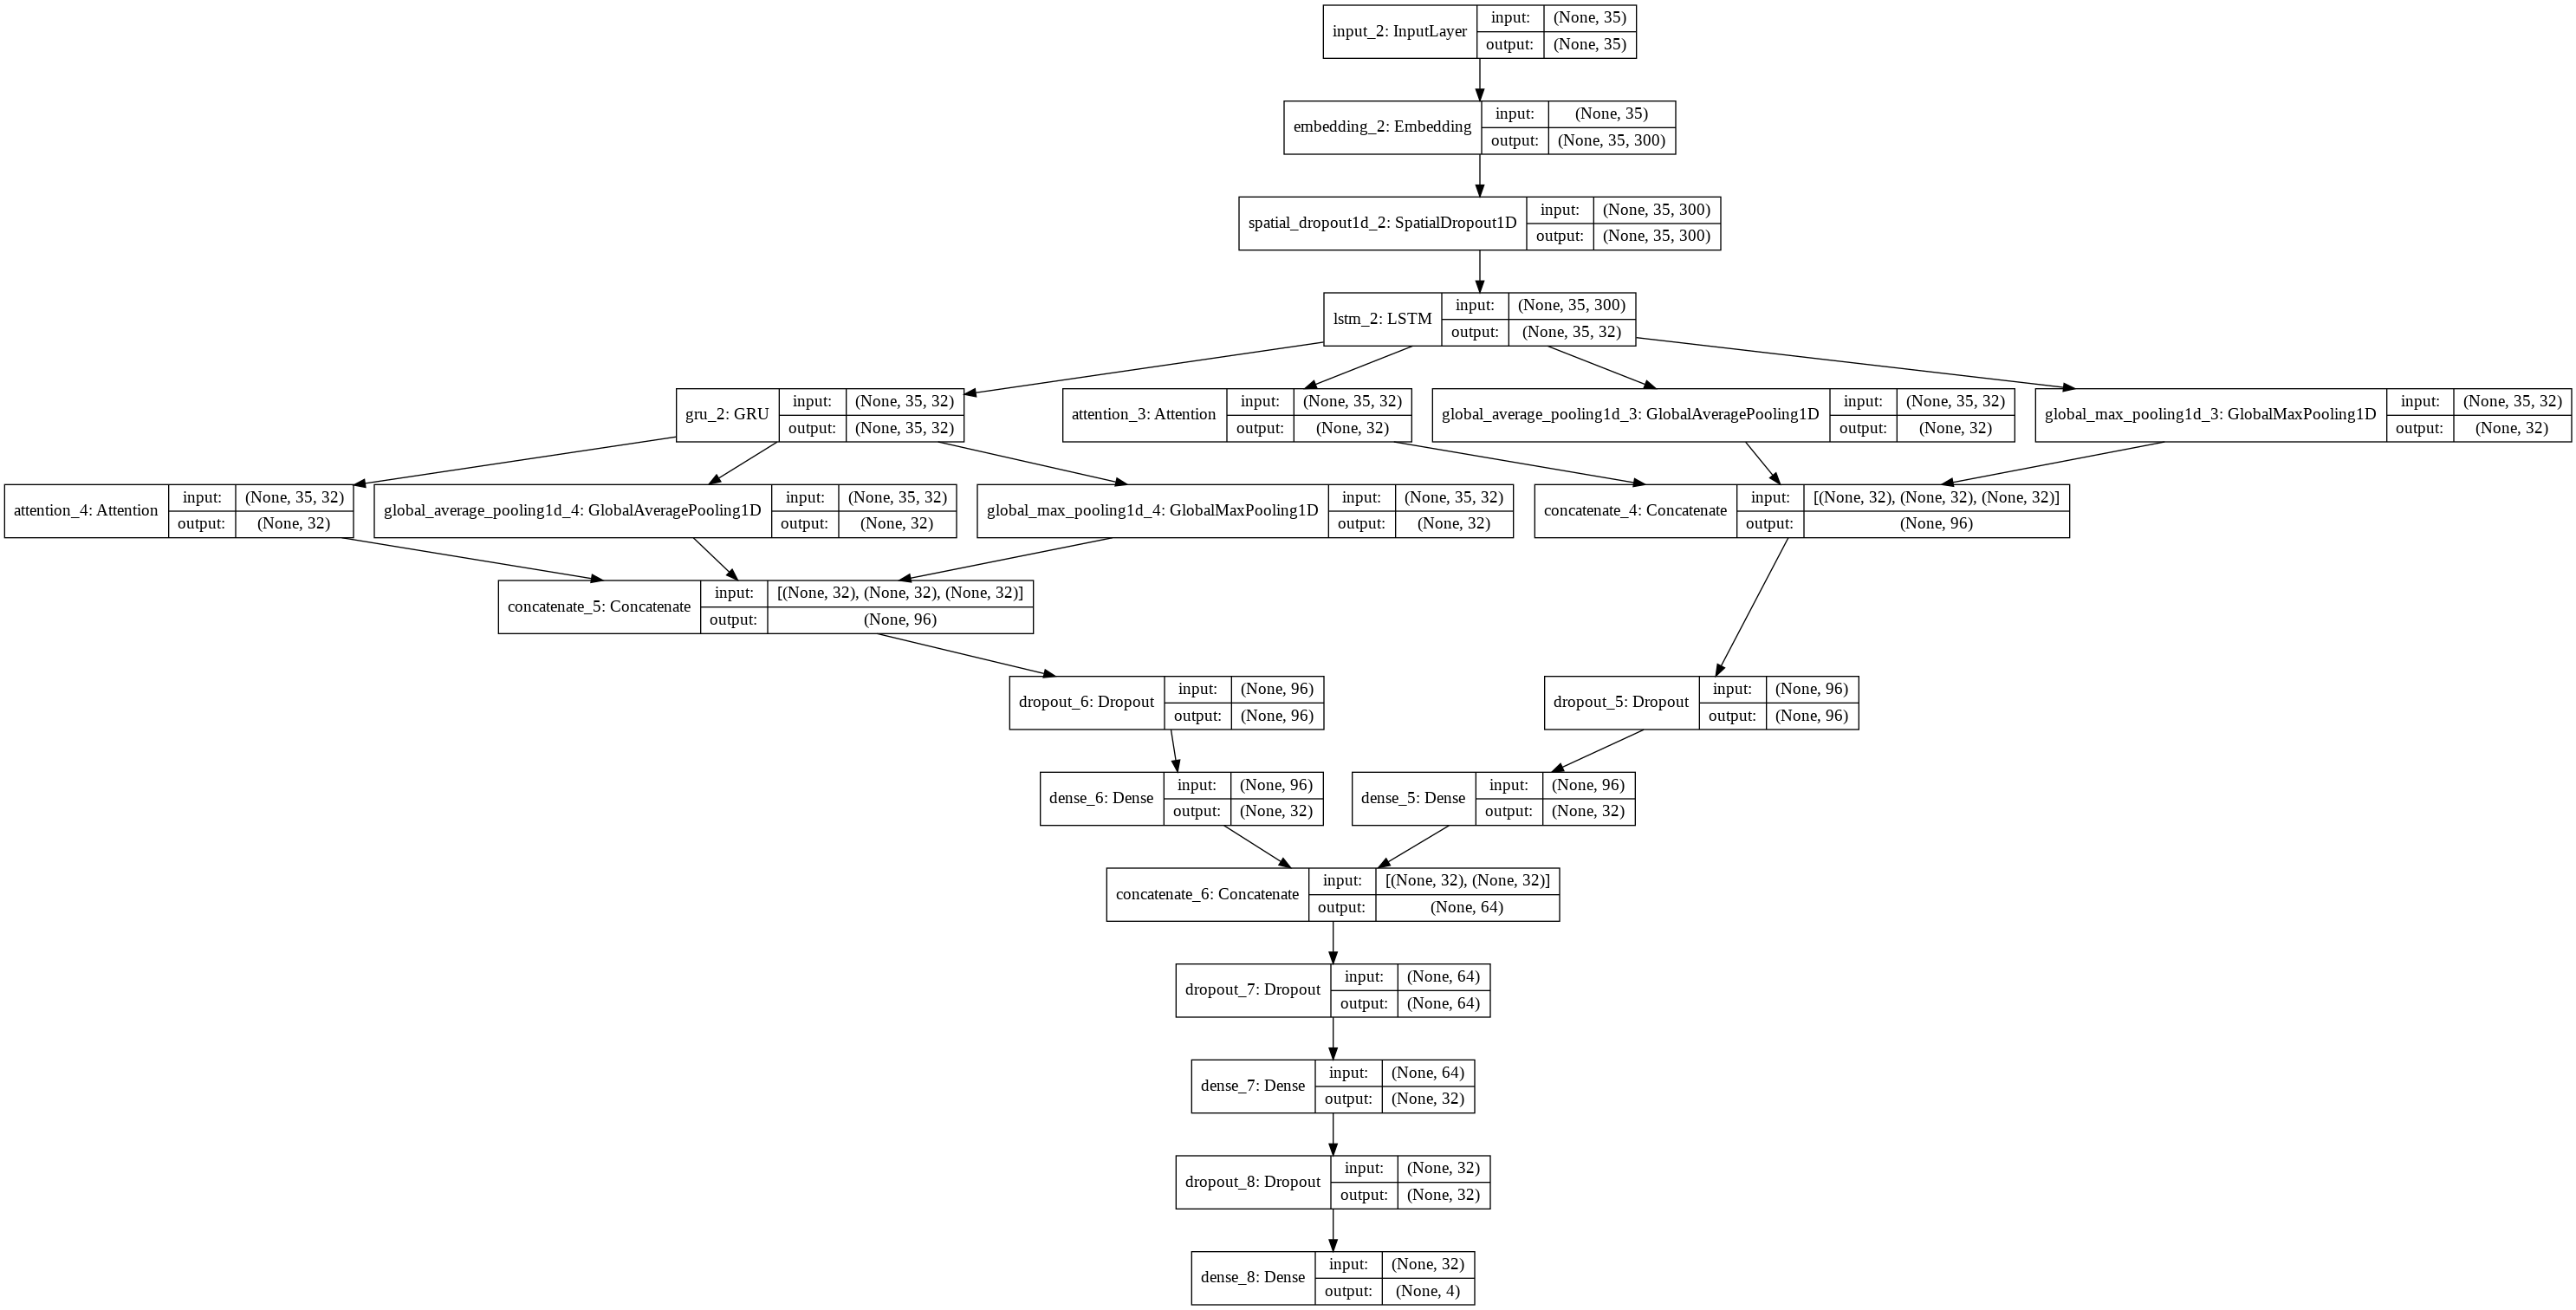

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/EmoContext/model.png', show_shapes=True)

In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 300)      4919700     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 35, 300)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 35, 32)       42624       spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [0]:
from keras.backend import int_shape
int_shape(model.input)

(None, 35)

In [0]:
model.trainable_weights

[<tf.Variable 'lstm_2/kernel:0' shape=(300, 128) dtype=float32_ref>,
 <tf.Variable 'lstm_2/recurrent_kernel:0' shape=(32, 128) dtype=float32_ref>,
 <tf.Variable 'lstm_2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gru_2/kernel:0' shape=(32, 96) dtype=float32_ref>,
 <tf.Variable 'gru_2/recurrent_kernel:0' shape=(32, 96) dtype=float32_ref>,
 <tf.Variable 'gru_2/bias:0' shape=(96,) dtype=float32_ref>,
 <tf.Variable 'attention_3/attention_3_W:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'attention_3/attention_3_b:0' shape=(35,) dtype=float32_ref>,
 <tf.Variable 'attention_4/attention_4_W:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'attention_4/attention_4_b:0' shape=(35,) dtype=float32_ref>,
 <tf.Variable 'dense_5/kernel:0' shape=(96, 32) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(96, 32) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_

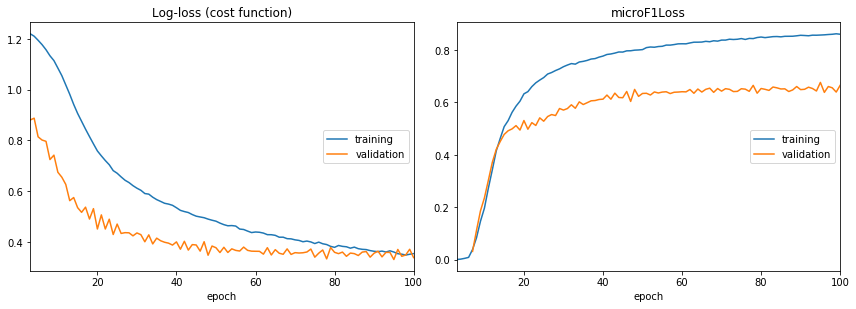

Log-loss (cost function):
training   (min:    0.348, max:    1.238, cur:    0.354)
validation (min:    0.331, max:    0.888, cur:    0.338)

microF1Loss:
training   (min:    0.000, max:    0.862, cur:    0.861)
validation (min:    0.031, max:    0.677, cur:    0.665)


In [0]:

from livelossplot.keras import PlotLossesCallback

model.fit(train_all, labels,
          batch_size=8192, epochs=100,
          callbacks=[PlotLossesCallback(), clr],
          verbose=0,
          validation_data=(eval_all,  evalLabels))

In [0]:
# !pip install livelossplot

In [0]:
from utils import CyclicLR
from utils import microF1Loss

In [0]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from torchtext.data import Example
from sklearn.metrics import f1_score
import torchtext
import os 
import copy
import time


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer
from unidecode import unidecode

In [19]:
! pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [0]:
class MyDataset(Dataset):
    def __init__(self,dataset):
        self.dataset = dataset
    def __getitem__(self,index):
        data,target = self.dataset[index]
        return data,target,index
    def __len__(self):
        return len(self.dataset)

In [0]:
def get_metrics(ground, predictions):
    """Given predicted labels and the respective ground truth labels, display some metrics
    Input: shape [# of samples, NUM_CLASSES]
        predictions : Model output. Every row has 4 decimal values, with the highest belonging to the predicted class
        ground : Ground truth labels, converted to one-hot encodings. A sample belonging to Happy class will be [0, 1, 0, 0]
    Output:
        accuracy : Average accuracy
        microPrecision : Precision calculated on a micro level. Ref -
        https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin/16001
        microRecall : Recall calculated on a micro level
        microF1 : Harmonic mean of microPrecision and microRecall. Higher value implies better classification
    """
    # [0.1, 0.3 , 0.2, 0.1] -> [0, 1, 0, 0]
    discretePredictions = to_categorical(predictions)
    ground = to_categorical(ground)
    truePositives = np.sum(discretePredictions * ground, axis=0)
    falsePositives = np.sum(np.clip(discretePredictions - ground, 0, 1), axis=0)
    falseNegatives = np.sum(np.clip(ground - discretePredictions, 0, 1), axis=0)

    print("True Positives per class : ", truePositives)
    print("False Positives per class : ", falsePositives)
    print("False Negatives per class : ", falseNegatives)

    #  Macro level calculation
    macroPrecision = 0
    macroRecall = 0
    f1_list = []
    # We ignore the "Others" class during the calculation of Precision, Recall and F1
    for c in range(NUM_EMO-1):
        precision = truePositives[c] / (truePositives[c] + falsePositives[c])
        macroPrecision += precision
        recall = truePositives[c] / (truePositives[c] + falseNegatives[c])
        macroRecall += recall
        f1 = (2 * recall * precision) / (precision + recall) if (precision + recall) > 0 else 0
        f1_list.append(f1)
        print("Class %s : Precision : %.3f, Recall : %.3f, F1 : %.3f" % (EMOS[c], precision, recall, f1))

    print('Direct average of macro F1s are :------> ', (f1_list[0] + f1_list[1] + f1_list[2]) / 3)
    macroPrecision /= 3
    macroRecall /= 3
    macroF1 = (2 * macroRecall * macroPrecision) / (macroPrecision + macroRecall) \
        if (macroPrecision + macroRecall) > 0 else 0
    print("Ignoring the Others class, Macro Precision : %.4f, Macro Recall : %.4f, Macro F1 : %.4f" % (
    macroPrecision, macroRecall, macroF1))

    # Micro level calculation
    truePositives = truePositives[1:].sum()
    falsePositives = falsePositives[1:].sum()
    falseNegatives = falseNegatives[1:].sum()

    print("Ignoring the Others class, Micro TP : %d, FP : %d, FN : %d"
          % (truePositives, falsePositives, falseNegatives))

    microPrecision = truePositives / (truePositives + falsePositives)
    microRecall = truePositives / (truePositives + falseNegatives)

    microF1 = (2 * microRecall * microPrecision) / (microPrecision + microRecall)\
        if (microPrecision + microRecall) > 0 else 0

    # predictions = predictions.argmax(axis=1)
    ground = ground.argmax(axis=1)
    accuracy = np.mean(predictions == ground)

    print("Accuracy : %.4f, Micro Precision : %.4f, Micro Recall : %.4f, Micro F1 : %.4f" % (
    accuracy, microPrecision, microRecall, microF1))
    return accuracy, microPrecision, microRecall, microF1

In [0]:
# code inspired from: https://github.com/anandsaha/pytorch.cyclic.learning.rate/blob/master/cls.py
class CyclicLR(object):
    def __init__(self, optimizer, base_lr=1e-3, max_lr=6e-3,
                 step_size=2000, mode='triangular', gamma=1.,
                 scale_fn=None, scale_mode='cycle', last_batch_iteration=-1):

        if not isinstance(optimizer, Optimizer):
            raise TypeError('{} is not an Optimizer'.format(
                type(optimizer).__name__))
        self.optimizer = optimizer

        if isinstance(base_lr, list) or isinstance(base_lr, tuple):
            if len(base_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} base_lr, got {}".format(
                    len(optimizer.param_groups), len(base_lr)))
            self.base_lrs = list(base_lr)
        else:
            self.base_lrs = [base_lr] * len(optimizer.param_groups)

        if isinstance(max_lr, list) or isinstance(max_lr, tuple):
            if len(max_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} max_lr, got {}".format(
                    len(optimizer.param_groups), len(max_lr)))
            self.max_lrs = list(max_lr)
        else:
            self.max_lrs = [max_lr] * len(optimizer.param_groups)

        self.step_size = step_size

        if mode not in ['triangular', 'triangular2', 'exp_range'] \
                and scale_fn is None:
            raise ValueError('mode is invalid and scale_fn is None')

        self.mode = mode
        self.gamma = gamma

        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = self._triangular_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = self._triangular2_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = self._exp_range_scale_fn
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode

        self.batch_step(last_batch_iteration + 1)
        self.last_batch_iteration = last_batch_iteration

    def batch_step(self, batch_iteration=None):
        if batch_iteration is None:
            batch_iteration = self.last_batch_iteration + 1
        self.last_batch_iteration = batch_iteration
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

    def _triangular_scale_fn(self, x):
        return 1.

    def _triangular2_scale_fn(self, x):
        return 1 / (2. ** (x - 1))

    def _exp_range_scale_fn(self, x):
        return self.gamma**(x)

    def get_lr(self):
        step_size = float(self.step_size)
        cycle = np.floor(1 + self.last_batch_iteration / (2 * step_size))
        x = np.abs(self.last_batch_iteration / step_size - 2 * cycle + 1)

        lrs = []
        param_lrs = zip(self.optimizer.param_groups, self.base_lrs, self.max_lrs)
        for param_group, base_lr, max_lr in param_lrs:
            base_height = (max_lr - base_lr) * np.maximum(0, (1 - x))
            if self.scale_mode == 'cycle':
                lr = base_lr + base_height * self.scale_fn(cycle)
            else:
                lr = base_lr + base_height * self.scale_fn(self.last_batch_iteration)
            lrs.append(lr)
        return lrs


In [0]:
# !pip install torchnlp
#!pip install pytorch-nlp

In [0]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    #return e_x / e_x.sum(axis=0)
    return e_x / e_x.sum()

In [0]:
def pytorch_model_run_cv(x_train,y_train,x_test, model_obj, feats = False,clip = True):
    seed_everything()
    avg_losses_f = []
    avg_val_losses_f = []
    # matrix for the out-of-fold predictions
    train_preds = np.zeros((len(x_train)))
    # matrix for the predictions on the test set
    test_preds = np.zeros((len(x_test)))
    splits = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED).split(x_train, y_train))
    for i, (train_idx, valid_idx) in enumerate(splits):
        seed_everything(i*1000+i)
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        if feats:
            features = np.array(features)
        x_train_fold = torch.tensor(x_train[train_idx.astype(int)], dtype=torch.long)
        # \.cuda()
        # y_train_fold = torch.tensor(y_train[train_idx.astype(int), np.newaxis], dtype=torch.float32)
        y_train_fold = torch.tensor(y_train[train_idx.astype(int)], dtype=torch.long)
        # \.cuda()
        if feats:
            kfold_X_features = features[train_idx.astype(int)]
            kfold_X_valid_features = features[valid_idx.astype(int)]
        x_val_fold = torch.tensor(x_train[valid_idx.astype(int)], dtype=torch.long)
        # \.cuda()
        # y_val_fold = torch.tensor(y_train[valid_idx.astype(int), np.newaxis], dtype=torch.float32)
        y_val_fold = torch.tensor(y_train[valid_idx.astype(int)], dtype=torch.long)
        # \.cuda()

        model = copy.deepcopy(model_obj)

        model
        # \.cuda()

        loss_fn = torch.nn.CrossEntropyLoss()

        step_size = 300
        base_lr, max_lr = 0.001, 0.005  
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), 
                                 lr=1e-3)

        ################################################################################################
        scheduler = CyclicLR(optimizer, base_lr=base_lr, max_lr=max_lr,
                   step_size=step_size, mode='exp_range',
                   gamma=0.99994)
        ###############################################################################################

        train = MyDataset(torch.utils.data.TensorDataset(x_train_fold, y_train_fold))
        valid = MyDataset(torch.utils.data.TensorDataset(x_val_fold, y_val_fold))

        train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
        valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

        print(f'Fold {i + 1}')
        for epoch in range(n_epochs):
            start_time = time.time()
            model.train()

            avg_loss = 0.  
            for i, (x_batch, y_batch, index) in enumerate(train_loader):
                if feats:       
                    f = kfold_X_features[index]
                    y_pred = model([x_batch,f])
                else:
                    y_pred = model(x_batch)

                if scheduler:
                    scheduler.batch_step()

                # Compute and print loss.
                # print(y_batch)
                loss = loss_fn(y_pred, y_batch)
                # print (loss.shape)
                optimizer.zero_grad()
                loss.backward()
                if clip:
                    nn.utils.clip_grad_norm_(model.parameters(),1)
                optimizer.step()
                avg_loss += loss.item() / len(train_loader)

            model.eval()

            valid_preds_fold = np.zeros((x_val_fold.size(0)))
            test_preds_fold = np.zeros((len(x_test)))

            avg_val_loss = 0.
            for i, (x_batch, y_batch,index) in enumerate(valid_loader):
                if feats:
                    f = kfold_X_valid_features[index]            
                    y_pred = model([x_batch,f]).detach()
                else:
                    y_pred = model(x_batch).detach()

                avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
                valid_preds_fold[index] = softmax(y_pred.cpu().numpy())[:, 0]

            elapsed_time = time.time() - start_time 
            print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f} \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, elapsed_time))
        avg_losses_f.append(avg_loss)
        avg_val_losses_f.append(avg_val_loss) 
        # predict all samples in the test set batch per batch
        for i, (x_batch,) in enumerate(test_loader):
            if feats:
                f = test_features[i * batch_size:(i+1) * batch_size]
                y_pred = model([x_batch,f]).detach()
            else:
                y_pred = model(x_batch).detach()

            test_preds_fold[i * batch_size:(i+1) * batch_size] = softmax(y_pred.cpu().numpy())[:, 0]

        train_preds[valid_idx] = valid_preds_fold
        test_preds += test_preds_fold / len(splits)

    print('All \t loss={:.4f} \t val_loss={:.4f} \t '.format(np.average(avg_losses_f),np.average(avg_val_losses_f)))
    return train_preds, test_preds
    

In [0]:
import torch as torch
x_test_cuda = torch.tensor(eval_all, dtype=torch.long)
# \.cuda()
test = torch.utils.data.TensorDataset(x_test_cuda)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [0]:
from torch.nn import Module
class ptAttention(Module):
    """
    Computes a weighted average of channels across timesteps (1 parameter pr. channel).
    """
    def __init__(self, attention_size, return_attention=False):
        """ Initialize the attention layer
        # Arguments:
            attention_size: Size of the attention vector.
            return_attention: If true, output will include the weight for each input token
                              used for the prediction
        """
        super(ptAttention, self).__init__()
        self.return_attention = return_attention
        self.attention_size = attention_size
        self.attention_vector = Parameter(torch.FloatTensor(attention_size))

    def __repr__(self):
        s = '{name}({attention_size}, return attention={return_attention})'
        return s.format(name=self.__class__.__name__, **self.__dict__)

    def forward(self, inputs, input_lengths):
        """ Forward pass.
        # Arguments:
            inputs (Torch.Variable): Tensor of input sequences
            input_lengths (torch.LongTensor): Lengths of the sequences
        # Return:
            Tuple with (representations and attentions if self.return_attention else None).
        """
        logits = inputs.matmul(self.attention_vector)
        unnorm_ai = (logits - logits.max()).exp()

        # Compute a mask for the attention on the padded sequences
        # See e.g. https://discuss.pytorch.org/t/self-attention-on-words-and-masking/5671/5
        # print ("unnorm_ai shape")
        # print (unnorm_ai.shape)
        max_len = unnorm_ai.size(1)
        idxes = torch.arange(0, max_len, out=torch.LongTensor(max_len)).unsqueeze(0)
        if torch.cuda.is_available():
            idxes = idxes.cuda()
        mask = Variable((idxes < input_lengths.unsqueeze(1)).float())
        # apply mask and renormalize attention scores (weights)
        masked_weights = unnorm_ai * mask
        att_sums = masked_weights.sum(dim=1, keepdim=True)  # sums per sequence
        attentions = masked_weights.div(att_sums)

        # print ("finished normalizing attention scores")
        # apply attention weights
        weighted = torch.mul(inputs, attentions.unsqueeze(-1).expand_as(inputs))

        # get the final fixed vector representations of the sentences
        representations = weighted.sum(dim=1)

        return (representations, attentions if self.return_attention else None)

In [0]:
import random
def seed_everything(seed=10):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()

In [0]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence

In [0]:
# from torchnlp.nn import Attention
from torch.nn import GRU, LSTM, Dropout, Dropout2d, Linear, Embedding, Parameter, ReLU, Softmax
import torch.functional as F
import torch as torch

class NelecModel(nn.Module):
    def __init__(self, embedding_matrix, hid_dim=32, maxlen=MAX_SEQUENCE_LENGTH, dp=0.25):
        super(NelecModel, self).__init__()

        num_embeddings, embedding_dim = embedding_matrix.shape
        self.embeddings = Embedding(num_embeddings, embedding_dim)
        self.embeddings.weight = Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embeddings.weight.requires_grad = False
        
        self.hidden_dim = hid_dim
        self.gru    = GRU(hid_dim, hid_dim, dropout=dp)
        self.embedding_dropout = nn.Dropout2d(dp)
        for name, param in self.gru.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

        self.lstm   = LSTM(embedding_dim, hid_dim, dropout=dp)

        for name, param in self.lstm.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)


        self.drop_out = Dropout(dp)
        self.attn   = ptAttention(hid_dim, return_attention=True)
        self.hidden = Linear(hid_dim*3, hid_dim) # hidden layer for lstm and gru
        self.hidden2 = Linear(hid_dim*2, NUM_CLASSES) # hidden layer for first concatenated dropout
        self.relu   = ReLU()
        # self.out    = Linear(NUM_CLASSES, 1)
        
    def forward(self, inp):
        # (batch_size, max_seq_length, embdding_dim)      
        inp_embed = self.embeddings(inp)

        # Spatial dropout2d implementation
        embeddings = inp_embed.unsqueeze(2)    # (N, T, 1, K)
        embeddings = embeddings.permute(0, 3, 2, 1)  # (N, K, 1, T)
        embeddings = self.embedding_dropout(embeddings)  # (N, K, 1, T), some features are masked
        embeddings = embeddings.permute(0, 3, 2, 1)  # (N, T, 1, K)
        inp_embed = embeddings.squeeze(2)  # (N, T, K)

        input_seqs = inp_embed
        input_lengths = torch.LongTensor([torch.max(input_seqs[i, :].data.nonzero()) + 1 for i in range(input_seqs.size()[0])])
        input_lengths, perm_idx = input_lengths.sort(0, descending=True)
        input_seqs = input_seqs[perm_idx][:, :input_lengths.max()]

        in_lstm, h_lstm = self.lstm(inp_embed)
        x_attn, _ = self.attn(in_lstm, input_lengths)

        # print ("X_attn size")
        # print (x_attn.shape)
        x_mean = torch.mean(in_lstm, 1)
        x_max, _ = torch.max(in_lstm, 1)
        x = torch.cat((x_attn, x_mean, x_max), dim=1)
        # print ("x concate")
        # print (x.shape)
        x = self.drop_out(x)
        # print ("x dropout")
        # print (x.shape)
        x = self.relu(self.hidden(x))
        # print ("x relu")
        # print (x.shape)
        
        # gru layer: 
        y_gru, y_hgru = self.gru(in_lstm)

        y_hgru = y_hgru.view(-1, self.hidden_dim )

        # print("tensor containing the next hidden state for each element in the batch")
        # print (y_hgru )
        # print (y_hgru.shape)
        # y_attn, _ = self.attn(y_hgru, input_lengths)
        y_attn, _ = self.attn(y_gru, input_lengths)
        y_mean = torch.mean(y_gru, 1)
        y_max,  _ = torch.max(y_gru, 1)
        y = torch.cat((y_attn, y_mean, y_max), dim=1)
        y = self.drop_out(y)
        y = self.relu(self.hidden(y))
        
        conc = torch.cat((x, y), dim=1)
        conc = self.drop_out(conc)
        conc = self.relu(self.hidden2(conc))
        conc = self.drop_out(conc)

        # print (conc)
        # print (conc.shape)
        # output = self.out(conc)
        
        return conc
        
        

In [0]:
n_splits = 5
n_epochs = 100
SEED = 24
batch_size=8192
train_preds, test_preds = pytorch_model_run_cv(train_all,
                                               np.argmax(labels, axis=1),
                                               eval_all,
                                               NelecModel(embedding_matrix=embedding_matrix),
                                               feats = False)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Fold 1
Epoch 1/100 	 loss=1.3498 	 val_loss=1.3291 	 time=21.57s
Epoch 2/100 	 loss=1.3252 	 val_loss=1.2967 	 time=20.82s
Epoch 3/100 	 loss=1.2993 	 val_loss=1.2664 	 time=20.90s
Epoch 4/100 	 loss=1.2894 	 val_loss=1.2502 	 time=21.16s
Epoch 5/100 	 loss=1.2925 	 val_loss=1.2492 	 time=21.17s
Epoch 6/100 	 loss=1.2861 	 val_loss=1.2533 	 time=21.00s
Epoch 7/100 	 loss=1.2833 	 val_loss=1.2596 	 time=20.75s
Epoch 8/100 	 loss=1.2855 	 val_loss=1.2634 	 time=22.01s
Epoch 9/100 	 loss=1.2845 	 val_loss=1.2626 	 time=21.23s
Epoch 10/100 	 loss=1.2871 	 val_loss=1.2585 	 time=20.87s
Epoch 11/100 	 loss=1.2853 	 val_loss=1.2548 	 time=20.94s
Epoch 12/100 	 loss=1.2821 	 val_loss=1.2527 	 time=20.68s
Epoch 13/100 	 loss=1.2869 	 val_loss=1.2530 	 time=20.99s
Epoch 14/100 	 loss=1.2854 	 val_loss=1.2549 	 time=20.97s
Epoch 15/100 	 loss=1.2844 	 val_loss=1.2567 	 time=20.84s
Epoch 16/100 	 loss=1.2801 	 val_loss=1.2554 	 time=21.24s
Epoch 17/100 	 loss=1.2812 	 val_loss=1.2512 	 time=21.20s

In [91]:
target

tensor([0, 1, 3])

In [89]:
input

tensor([[ 0.3532,  1.2717,  1.1433, -0.2254,  0.8920],
        [ 0.1332,  0.7552, -0.4545,  0.3219,  1.3618],
        [-1.5671,  0.8154,  1.4264, -0.1327,  0.3361]], requires_grad=True)